# AlexNet Implementation on MNIST dataset
## Author: Tom Tabak (Student ID:160889015)

(60000, 28, 28)
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 54, 54, 96)        11712     
_________________________________________________________________
activation_6 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 23, 256)       614656    
_________________________________________________________________
activation_7 (Activation)    (None, 23, 23, 256)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9,

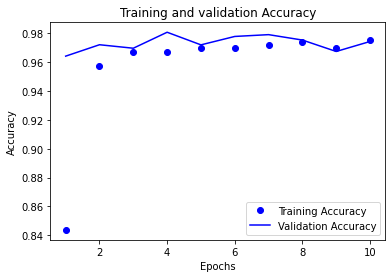

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import keras.backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import tensorflow as tf


(x_train, y_train), (x_test, y_test) =mnist.load_data()

x_train=x_train.astype('uint8')
x_test=x_test.astype('uint8')

no_classes = len(list(set(y_train)))

y_train, y_test=keras.utils.to_categorical(y_train, no_classes), keras.utils.to_categorical(y_test, no_classes)
print(np.shape(x_train))
X_train = []
for i in range(np.shape(x_train)[0]):
    res = cv2.resize(x_train[i], (224, 224))
    X_train.append(res)
X_train=np.array(X_train)
X_train = np.reshape(X_train, [np.shape(X_train)[0], 224,224,1])

'''
X_train = np.array([cv2.resize(img, dsize=(227,227), interpolation=cv2.INTER_CUBIC) for img in X_train])
X_val =np.array([cv2.resize(img, dsize=(227,227), interpolation=cv2.INTER_CUBIC) for img in X_val])
X_test = np.array([cv2.resize(img, dsize=(227,227), interpolation=cv2.INTER_CUBIC) for img in X_test])

X_train = X_train.reshape(X_train.shape[0], 227,227,1)
X_test = X_test.reshape(X_test.shape[0], 227,227,1)
X_val = X_val.reshape(X_val.shape[0], 227, 227,1)
print('ok')
'''




np.random.seed(1000)
#Instantiate an empty model

def AlexNet():
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=(224,224,1), kernel_size=(11,11), strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

    # Passing it to a Fully Connected layer
    model.add(Flatten())
    # 1st Fully Connected Layer
    model.add(Dense(4096, input_shape=(227*227*3,), activation='relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.4))

    # 2nd Fully Connected Layer
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.4))

    # 3rd Fully Connected Layer
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.4))

    # Output Layer
    model.add(Dense(no_classes, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

AlexNet = AlexNet()

hist = AlexNet.fit(X_train, y_train, verbose=2, validation_split=0.2, epochs=10, batch_size=32)#, steps_per_epoch=1000, validation_steps=1000)


history_dict = hist.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


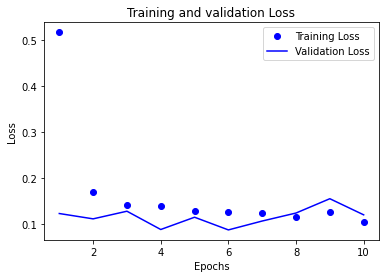

In [0]:

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [0]:
X_test = []
for i in range(np.shape(x_test)[0]):
    res = cv2.resize(x_test[i], (224, 224))
    X_test.append(res)
X_test=np.array(X_test)
X_test = np.reshape(X_test, [np.shape(X_test)[0], 224,224,1])
print('Accuracy: {}'.format(AlexNet.evaluate(X_test, y_test, batch_size=32)[1]))

10000/10000 [==============================] - 7s 654us/step
Accuracy: 0.9804999828338623


In [0]:
import sklearn
predictions = AlexNet.predict(X_test)
class_report = sklearn.metrics.classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.97      0.98      0.98       982
           5       0.97      0.98      0.97       892
           6       0.98      0.99      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

